In [1]:
!pip install hvplot

In [3]:
# Import required libraries and dependencies
import io
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
from google.colab import files
uploaded = files.upload()


Saving crypto_market_data.csv to crypto_market_data (8).csv


In [16]:
print(uploaded)

{'crypto_market_data (8).csv': b'coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y\r\nbitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.5184,37.51761\r\nethereum,0.22392,10.38134,4.80849,0.13169,-12.8889,186.77418,101.96023\r\ntether,-0.21173,0.04935,0.0064,-0.04237,0.28037,-0.00542,0.01954\r\nripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193\r\nbitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384\r\nbinancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195\r\nchainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186\r\ncardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756\r\nlitecoin,-0.06341,6.60221,7.28931,1.21662,-17.2396,27.49919,-12.66408\r\nbitcoin-cash-sv,0.9253,3.29641,-1.86656,2.88926,-24.87434,7.42562,93.73082\r\ncrypto-com-chain,

In [17]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(io.BytesIO(uploaded['crypto_market_data (8).csv']))
df_market_data.set_index("coin_id", inplace=True)

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [18]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [19]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [52]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_scaler = StandardScaler().fit_transform(df_market_data)
market_data_scaler

array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [53]:
# Create a DataFrame with the scaled data
market_data_scaler_df = pd.DataFrame(market_data_scaler, columns=df_market_data.columns)

# Copy the crypto names from the original data
market_data_scaler_df["coin_id"] = df_market_data.index

# Set the coinid column as index
market_data_scaler_df.set_index("coin_id", inplace=True)

# Display sample data
market_data_scaler_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [54]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,12))

k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [55]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(market_data_scaler_df)
    inertia.append(k_model.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [56]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

elbow_df

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.405923
5,6,52.933559
6,7,47.983124
7,8,37.288187
8,9,33.061685
9,10,28.779752


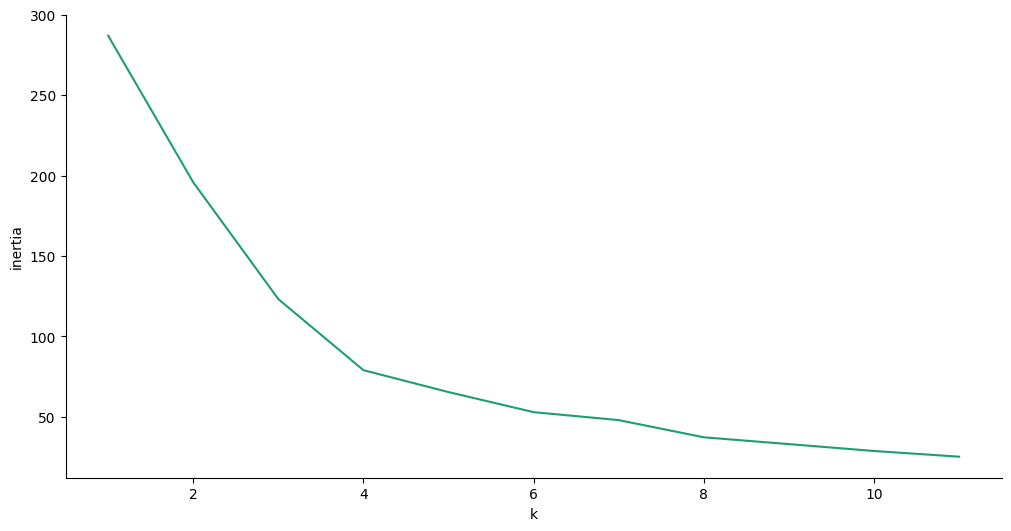

In [51]:
# @title k vs inertia

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['k']
  ys = series['inertia']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = elbow_df.sort_values('k', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('k')
_ = plt.ylabel('inertia')

In [57]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
market_data_elbow_plot = elbow_df.hvplot.line(
    x="k",
    y="inertia",
    xticks=k
)

market_data_elbow_plot

:Curve   [k]   (inertia)

#### Answer the following question:

**Question:** What is the best value for `k`?

**Answer:** 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [58]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [59]:
# Fit the K-Means model using the scaled data
model.fit(market_data_scaler_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [60]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = model.predict(market_data_scaler_df)

# Print the resulting array of cluster values.
print(clusters)

[3 3 1 1 3 3 3 3 3 1 1 1 1 3 1 3 1 1 3 1 1 3 1 1 1 1 1 1 3 1 1 1 0 3 1 1 2
 1 1 1 1]


In [61]:
# Create a copy of the DataFrame
market_data_predictions_df = market_data_scaler_df.copy()

In [62]:
# Add a new column to the DataFrame with the predicted clusters
market_data_predictions_df['predicted_cluster'] = clusters

# Display sample data
market_data_predictions_df.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predicted_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


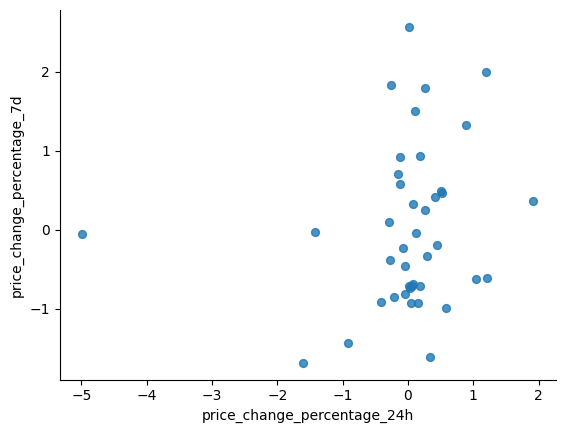

In [89]:
# @title price_change_percentage_24h vs price_change_percentage_7d

from matplotlib import pyplot as plt
market_data_predictions_df.plot(kind='scatter', x='price_change_percentage_24h', y='price_change_percentage_7d', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [64]:
# Create a scatter plot using hvPlot by setting
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
market_data_scatterplot = market_data_predictions_df.hvplot.scatter(x="price_change_percentage_24h",
                                                               y="price_change_percentage_7d",
                                                               by="predicted_cluster",
                                                               hover_cols="coin_id")
market_data_scatterplot

:NdOverlay   [predicted_cluster]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)

---

### Optimize Clusters with Principal Component Analysis.

In [65]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [66]:
# Use the PCA model with `fit_transform` to reduce to
# three principal components.
market_data_pca = pca.fit_transform(market_data_scaler_df)

# View the first five rows of the DataFrame.
market_data_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [67]:
# Retrieve the explained variance to determine how much information
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

In [68]:
# Find the total explained variance of the three principal components?
sum(pca.explained_variance_ratio_)

0.895031657030984

#### Answer the following question:

**Question:** What is the total explained variance of the three principal components?

**Answer:** 89.5%

In [69]:
# Create a new DataFrame with the PCA data.
market_data_pca_df = pd.DataFrame(
    market_data_pca,
    columns=["PC1", "PC2", "PC3"]
)

# Copy the crypto names from the original data
market_data_pca_df["coin_id"] = market_data_pca_df.index

# Set the coinid column as index
market_data_pca_df = market_data_pca_df.set_index("coin_id")

# Display sample data
market_data_pca_df.head()

,PC1,PC2,PC3
coin_id,,,
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


---

### Find the Best Value for k Using the PCA Data

In [70]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,12))

k

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [71]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=1)
    k_model.fit(market_data_pca_df)
    inertia.append(k_model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [72]:
# Create a dictionary with the data to plot the Elbow curve
pca_elbow_data = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
pca_elbow_data_df = pd.DataFrame(pca_elbow_data)
pca_elbow_data_df.head()


,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,38.352251


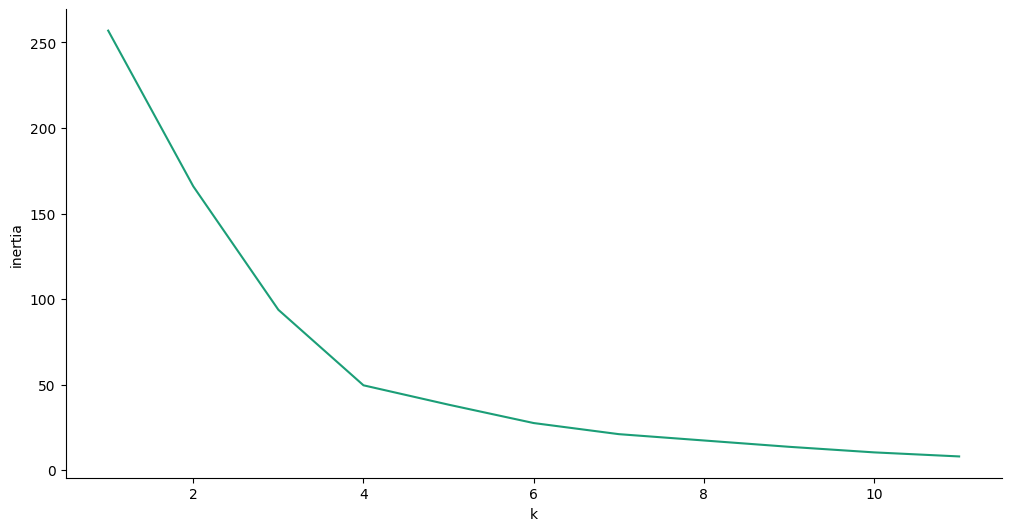

In [73]:
# @title k vs inertia

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['k']
  ys = series['inertia']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = pca_elbow_data_df.sort_values('k', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('k')
_ = plt.ylabel('inertia')

In [74]:
# Plot a line chart with all the inertia values computed with
# the different values of k to visually identify the optimal value for k.
pca_elbow_data_plot = pca_elbow_data_df.hvplot.line(
    x="k",
    y="inertia",
    xticks=k
)

pca_elbow_data_plot

:Curve   [k]   (inertia)

#### Answer the following questions:

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [75]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=1)

In [76]:
# Fit the K-Means model using the PCA data
model.fit(market_data_pca_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=1)

In [77]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = model.predict(market_data_pca_df)

# Print the resulting array of cluster values.
print(clusters)

[1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 2 1 0 0 3
 0 0 0 0]


In [78]:
# Create a copy of the DataFrame with the PCA data
market_data_pca_predictions_df = market_data_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
market_data_pca_predictions_df["Predicted Cluster"] = clusters

# Display sample data
market_data_pca_predictions_df.head()

,PC1,PC2,PC3,Predicted Cluster
coin_id,,,,
0,-0.600667,0.842760,0.461595,1
1,-0.458261,0.458466,0.952877,1
2,-0.433070,-0.168126,-0.641752,0
3,-0.471835,-0.222660,-0.479053,0
4,-1.157800,2.041209,1.859715,1


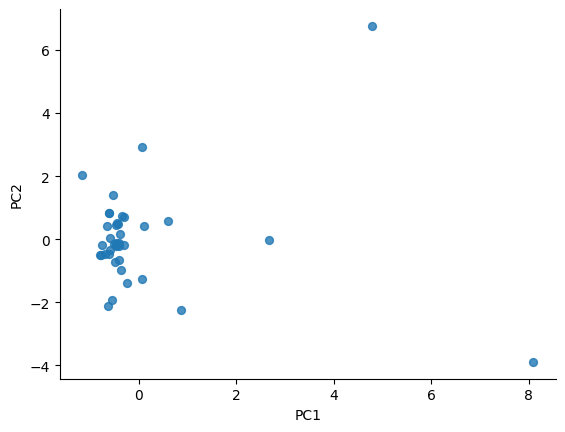

In [79]:
# @title PC1 vs PC2

from matplotlib import pyplot as plt
market_data_pca_predictions_df.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [80]:
# Create a scatter plot using hvPlot by setting
# `x="PC1"` and `y="PC2"`.
# Color the graph points with the labels found using K-Means and
# add the crypto name in the `hover_cols` parameter to identify
# the cryptocurrency represented by each data point.
pca_scatterplot = market_data_pca_predictions_df.hvplot.scatter(x="PC1",
                                                         y="PC2",
                                                         by="Predicted Cluster",
                                                         hover_cols="coin_id")
pca_scatterplot

:NdOverlay   [Predicted Cluster]
   :Scatter   [PC1]   (PC2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [86]:
# Composite plot to contrast the Elbow curves
elbow_comparison =  market_data_elbow_plot + pca_elbow_data_plot
elbow_comparison

/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [87]:
# Composite plot to contrast the clusters
cluster_comparison =  market_data_scatterplot + pca_scatterplot
cluster_comparison

/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_drag' property; using the latest value
  layout_plot = gridplot(
/usr/local/lib/python3.10/dist-packages/holoviews/plotting/bokeh/plot.py:987: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  layout_plot = gridplot(


:Layout
   .NdOverlay.I  :NdOverlay   [predicted_cluster]
      :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,coin_id)
   .NdOverlay.II :NdOverlay   [Predicted Cluster]
      :Scatter   [PC1]   (PC2,coin_id)

#### Answer the following question:

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Reducing features appears to have resulted in tighter, more populated clusters.